In [ ]:
import os
from glob import glob
from tqdm import tqdm


save_path = "./"
train_pattern = os.path.join(save_path, "cv2_dataset/leftImg8bit/train/**/*.png")
valid_pattern = os.path.join(save_path, "cv2_dataset/leftImg8bit/val/**/*.png")

train_path = glob(train_pattern)
valid_path = glob(valid_pattern)

In [ ]:
cityscapes_labels = [
    # name, id, trainId, category, catId, hasInstances, ignoreInEval, color
    { 'name': 'unlabeled', 'id': 0, 'trainId': 255, 'category': 'void', 'catId': 0, 'hasInstances': False, 'ignoreInEval': True, 'color': (0, 0, 0) },
    { 'name': 'ego vehicle', 'id': 1, 'trainId': 255, 'category': 'void', 'catId': 0, 'hasInstances': False, 'ignoreInEval': True, 'color': (0, 0, 0) },
    { 'name': 'rectification border', 'id': 2, 'trainId': 255, 'category': 'void', 'catId': 0, 'hasInstances': False, 'ignoreInEval': True, 'color': (0, 0, 0) },
    { 'name': 'out of roi', 'id': 3, 'trainId': 255, 'category': 'void', 'catId': 0, 'hasInstances': False, 'ignoreInEval': True, 'color': (0, 0, 0) },
    { 'name': 'static', 'id': 4, 'trainId': 255, 'category': 'void', 'catId': 0, 'hasInstances': False, 'ignoreInEval': True, 'color': (0, 0, 0) },
    { 'name': 'dynamic', 'id': 5, 'trainId': 255, 'category': 'void', 'catId': 0, 'hasInstances': False, 'ignoreInEval': True, 'color': (111, 74, 0) },
    { 'name': 'ground', 'id': 6, 'trainId': 255, 'category': 'void', 'catId': 0, 'hasInstances': False, 'ignoreInEval': True, 'color': (81, 0, 81) },
    { 'name': 'road', 'id': 7, 'trainId': 0, 'category': 'flat', 'catId': 1, 'hasInstances': False, 'ignoreInEval': False, 'color': (128, 64, 128) },
    { 'name': 'sidewalk', 'id': 8, 'trainId': 1, 'category': 'flat', 'catId': 1, 'hasInstances': False, 'ignoreInEval': False, 'color': (244, 35, 232) },
    { 'name': 'parking', 'id': 9, 'trainId': 255, 'category': 'flat', 'catId': 1, 'hasInstances': False, 'ignoreInEval': True, 'color': (250, 170, 160) },
    { 'name': 'rail track', 'id': 10, 'trainId': 255, 'category': 'flat', 'catId': 1, 'hasInstances': False, 'ignoreInEval': True, 'color': (230, 150, 140) },
    { 'name': 'building', 'id': 11, 'trainId': 2, 'category': 'construction', 'catId': 2, 'hasInstances': False, 'ignoreInEval': False, 'color': (70, 70, 70) },
    { 'name': 'wall', 'id': 12, 'trainId': 3, 'category': 'construction', 'catId': 2, 'hasInstances': False, 'ignoreInEval': False, 'color': (102, 102, 156) },
    { 'name': 'fence', 'id': 13, 'trainId': 4, 'category': 'construction', 'catId': 2, 'hasInstances': False, 'ignoreInEval': False, 'color': (190, 153, 153) },
    { 'name': 'guard rail', 'id': 14, 'trainId': 255, 'category': 'construction', 'catId': 2, 'hasInstances': False, 'ignoreInEval': True, 'color': (180, 165, 180) },
    { 'name': 'bridge', 'id': 15, 'trainId': 255, 'category': 'construction', 'catId': 2, 'hasInstances': False, 'ignoreInEval': True, 'color': (150, 100, 100) },
    { 'name': 'tunnel', 'id': 16, 'trainId': 255, 'category': 'construction', 'catId': 2, 'hasInstances': False, 'ignoreInEval': True, 'color': (150, 120, 90) },
    { 'name': 'pole', 'id': 17, 'trainId': 5, 'category': 'object', 'catId': 3, 'hasInstances': False, 'ignoreInEval': False, 'color': (153, 153, 153) },
    { 'name': 'polegroup', 'id': 18, 'trainId': 255, 'category': 'object', 'catId': 3, 'hasInstances': False, 'ignoreInEval': True, 'color': (153, 153, 153) },
    { 'name': 'traffic light', 'id': 19, 'trainId': 6, 'category': 'object', 'catId': 3, 'hasInstances': False, 'ignoreInEval': False, 'color': (250, 170, 30) },
    { 'name': 'traffic sign', 'id': 20, 'trainId': 7, 'category': 'object', 'catId': 3, 'hasInstances': False, 'ignoreInEval': False, 'color': (220, 220, 0) },
    { 'name': 'vegetation', 'id': 21, 'trainId': 8, 'category': 'nature', 'catId': 4, 'hasInstances': False, 'ignoreInEval': False, 'color': (107, 142, 35) },
    { 'name': 'terrain', 'id': 22, 'trainId': 9, 'category': 'nature', 'catId': 4, 'hasInstances': False, 'ignoreInEval': False, 'color': (152, 251, 152) },
    { 'name': 'sky', 'id': 23, 'trainId': 10, 'category': 'sky', 'catId': 5, 'hasInstances': False, 'ignoreInEval': False, 'color': (70, 130, 180) },
    { 'name': 'person', 'id': 24, 'trainId': 11, 'category': 'human', 'catId': 6, 'hasInstances': True, 'ignoreInEval': False, 'color': (220, 20, 60) },
    { 'name': 'rider', 'id': 25, 'trainId': 12, 'category': 'human', 'catId': 6, 'hasInstances': True, 'ignoreInEval': False, 'color': (255, 0, 0) },
    { 'name': 'car', 'id': 26, 'trainId': 13, 'category': 'vehicle', 'catId': 7, 'hasInstances': True, 'ignoreInEval': False, 'color': (0, 0, 142) },
    { 'name': 'truck', 'id': 27, 'trainId': 14, 'category': 'vehicle', 'catId': 7, 'hasInstances': True, 'ignoreInEval': False, 'color': (0, 0, 70) },
    { 'name': 'bus', 'id': 28, 'trainId': 15, 'category': 'vehicle', 'catId': 7, 'hasInstances': True, 'ignoreInEval': False, 'color': (0, 60, 100) },
    { 'name': 'caravan', 'id': 29, 'trainId': 255, 'category': 'vehicle', 'catId': 7, 'hasInstances': True, 'ignoreInEval': True, 'color': (0, 0, 90) },
    { 'name': 'trailer', 'id': 30, 'trainId': 255, 'category': 'vehicle', 'catId': 7, 'hasInstances': True, 'ignoreInEval': True, 'color': (0, 0, 110) },
    { 'name': 'train', 'id': 31, 'trainId': 16, 'category': 'vehicle', 'catId': 7, 'hasInstances': True, 'ignoreInEval': False, 'color': (0, 80, 100) },
    { 'name': 'motorcycle', 'id': 32, 'trainId': 17, 'category': 'vehicle', 'catId': 7, 'hasInstances': True, 'ignoreInEval': False, 'color': (0, 0, 230) },
    { 'name': 'bicycle', 'id': 33, 'trainId': 18, 'category': 'vehicle', 'catId': 7, 'hasInstances': True, 'ignoreInEval': False, 'color': (119, 11, 32) },
    { 'name': 'license plate', 'id': -1, 'trainId': -1, 'category': 'vehicle', 'catId': 7, 'hasInstances': False, 'ignoreInEval': True, 'color': (0, 0, 142) },
]


In [ ]:
import torch
import torchvision.transforms.v2 as transforms
from torch.utils.data import DataLoader,Dataset
from torchvision import tv_tensors
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


BATCH_SIZE = 8
IMG_SIZE = (256, 256)

class CityscapesDataset(Dataset):
    def __init__(self, image_path, transform_img = None, transform_label = None, img_size = (256, 256)):
        self.image_path = image_path
        self.transform_img = transform_img
        self.transform_label = transform_label
        self.img_size = img_size

    def __len__(self):
        return len(self.image_path)

    def __getitem__(self, idx):

        img_path = self.image_path[idx]
        label_path = img_path.replace("_leftImg8bit", "_gtFine_labelIds").replace("leftImg8bit", "gtFine")

        image = tv_tensors.Image(Image.open(img_path).convert('RGB'))
        label = tv_tensors.Mask(Image.open(label_path).convert('L'))

        if self.transform_img:
            image = self.transform_img(image)

        if self.transform_label:
            label = self.transform_label(label)

        return image, label


image_transforms = transforms.Compose([
    transforms.ToImage(),
    transforms.Resize(IMG_SIZE),
    transforms.ToDtype(torch.float32, scale=True),
])

label_transforms = transforms.Compose([
    transforms.ToImage(),
    transforms.Resize(IMG_SIZE),
    transforms.ToDtype(torch.float32, scale=True),
])

train_dataset = CityscapesDataset(train_path, image_transforms, label_transforms, IMG_SIZE)
val_dataset = CityscapesDataset(valid_path, image_transforms, label_transforms, IMG_SIZE)

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=1, drop_last=False, pin_memory=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=1, drop_last=False, pin_memory=True)

/home/mode_ac/anaconda3/envs/sco_age_verification/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
def ids_to_colors(ids_tensor, palette_dict):
    id_to_color = {color_info['id']: color_info['color'] for color_info in palette_dict}

    batch_size, height, width = ids_tensor.shape

    colors_array = np.zeros((batch_size, height, width, 3), dtype=np.uint8)
    for key, color in id_to_color.items():
        colors_array[ids_tensor == key] = color

    colors_array = colors_array.transpose(0, 3, 1, 2)
    colors_array = colors_array[0]

    return colors_array

def show_batch(whole_batch):
    images, label = whole_batch[0], whole_batch[1]
    images = images.numpy()
    label = label.numpy()
    fig, lab = plt.subplots(5, 2, figsize = (10, 30))

    for i in range(5):
        # print(images[i].shape)
        lab[i][0].imshow(np.transpose(images[i], (1,2,0)))
        lab[i][1].imshow(np.transpose(ids_to_colors(label[i], cityscapes_labels), (1,2,0)))

/home/mode_ac/anaconda3/envs/sco_age_verification/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


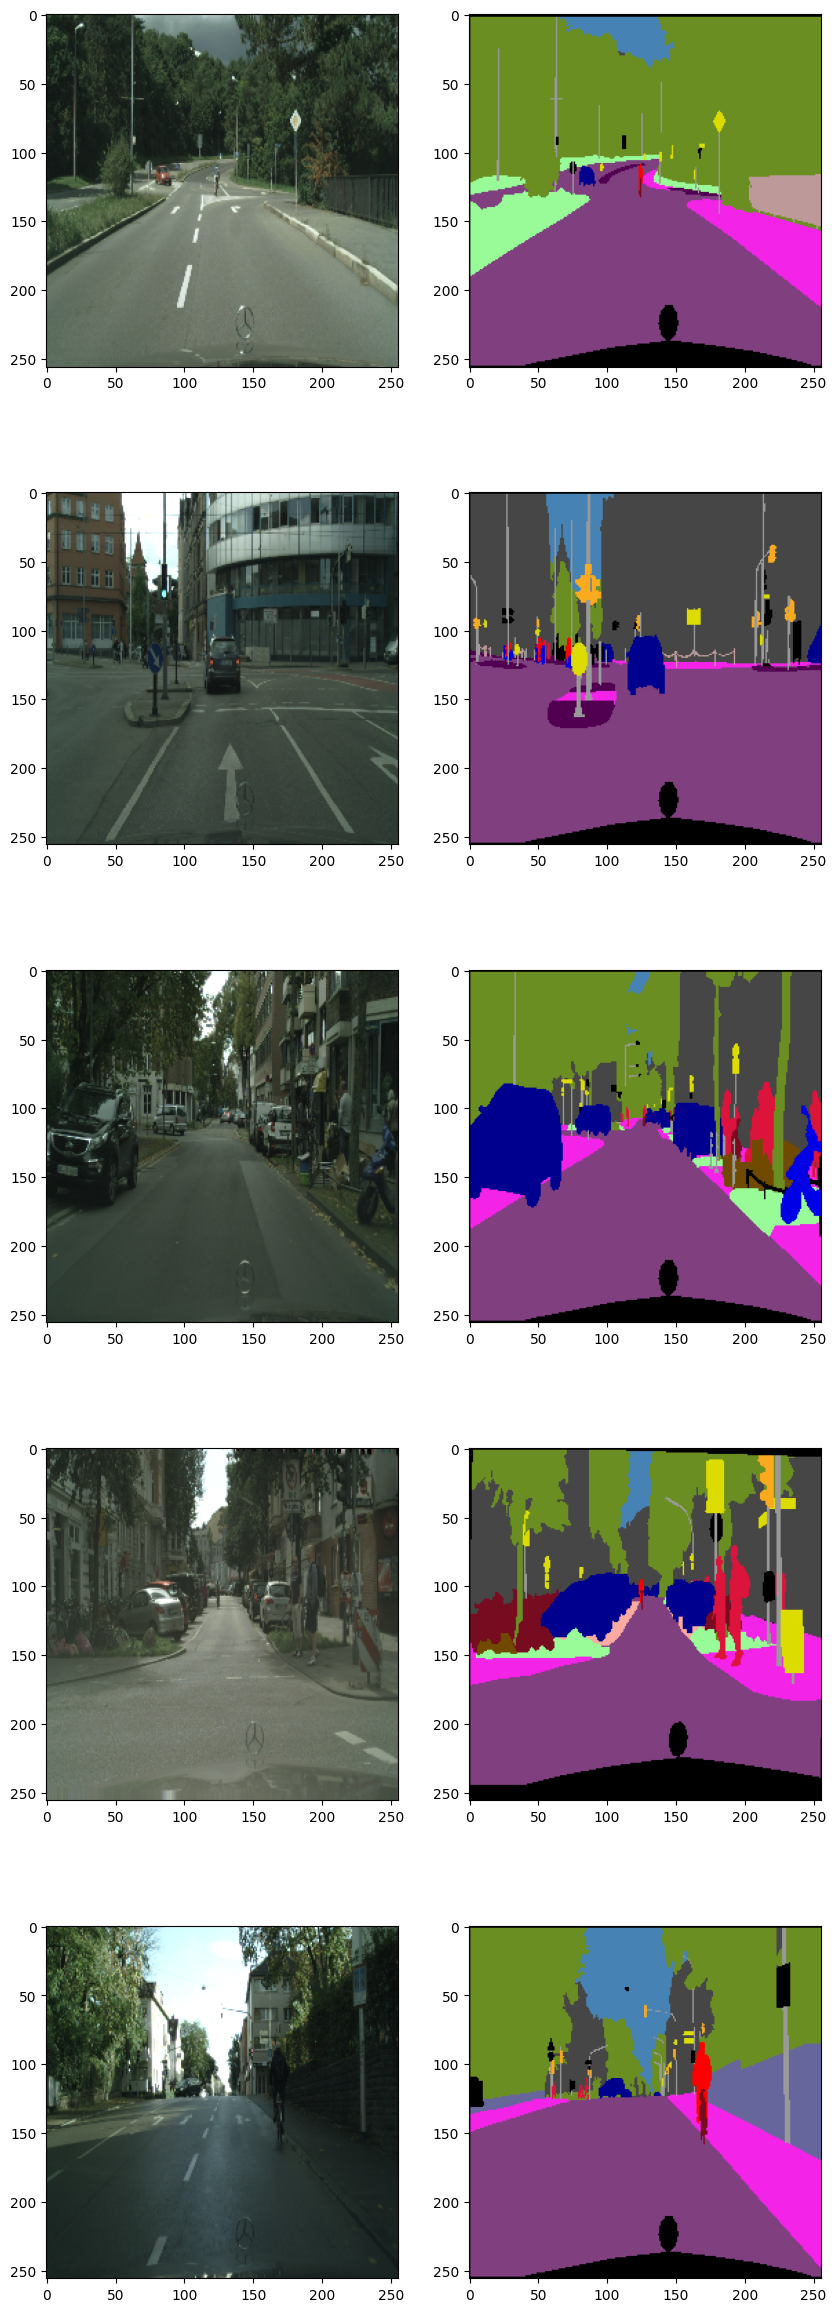

In [ ]:
data_batch = next(iter(train_dataloader))
show_batch(data_batch)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class DownscalingBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DownscalingBlock, self).__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn = nn.BatchNorm2d(out_channels)
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x, max_pool=True):
        conv = self.conv1(x)
        conv = self.bn(conv)
        conv = F.relu(conv)

        conv = self.conv2(conv)
        conv = F.relu(conv)

        if max_pool:
            next = self.max_pool(conv)
        else:
            next = conv

        skip_connection = conv
        return next, skip_connection


class UpscalingBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UpscalingBlock, self).__init__()

        self.up = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2)
        self.bn = nn.BatchNorm2d(out_channels)
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)

    def forward(self, x, skip_connection):
        up = self.up(x)

        merge = torch.cat([up, skip_connection], dim=1)
        conv = self.conv1(merge)
        conv = self.bn(conv)
        conv = F.relu(conv)

        conv = self.conv2(conv)
        conv = F.relu(conv)
        return conv


class UNet(nn.Module):
    def __init__(self, in_channels, out_channels, num_classes):
        super(UNet, self).__init__()

        self.d_1 = DownscalingBlock(in_channels, out_channels)
        self.d_2 = DownscalingBlock(out_channels, out_channels * 2)
        self.d_3 = DownscalingBlock(out_channels * 2, out_channels * 4)
        self.d_4 = DownscalingBlock(out_channels * 4, out_channels * 8)

        self.bottleneck = DownscalingBlock(out_channels * 8, out_channels * 16)

        self.u_4 = UpscalingBlock(out_channels * 16, out_channels * 8)
        self.u_3 = UpscalingBlock(out_channels * 8, out_channels * 4)
        self.u_2 = UpscalingBlock(out_channels * 4, out_channels * 2)
        self.u_1 = UpscalingBlock(out_channels * 2, out_channels)

        self.out_conv = nn.Conv2d(out_channels, num_classes, kernel_size=1)

    def forward(self, x):
        conv, skip1 = self.d_1(x)
        conv, skip2 = self.d_2(conv)
        conv, skip3 = self.d_3(conv)
        conv, skip4 = self.d_4(conv)

        conv, _ = self.bottleneck(conv, max_pool=False)

        conv = self.u_4(conv, skip4)
        conv = self.u_3(conv, skip3)
        conv = self.u_2(conv, skip2)
        conv = self.u_1(conv, skip1)

        return self.out_conv(conv)

In [ ]:
N_CLASSES = len(cityscapes_labels)
model = UNet(in_channels=3, out_channels=64, num_classes=N_CLASSES)

In [ ]:
from torchmetrics.classification import MulticlassJaccardIndex, MulticlassAveragePrecision
import torch.optim as optim
import torch.nn as nn

def train(model, train_loader, val_loader, num_cls, lr=0.001, decay=1e-5, epochs=15, device="cuda"):
    model = model.to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=decay)
    m_iou = MulticlassJaccardIndex(num_classes=num_cls).to(device)
    m_ap = MulticlassAveragePrecision(num_classes=num_cls).to(device)

    num_train_batches, num_val_batches = len(train_loader), len(val_loader)

    running_loss_train, running_loss_val, iou_val, ap_val = [], [], [], []
    max_ap = 0.0

    for epoch in range(epochs):
        train_loss, val_loss, val_iou, val_ap = 0, 0, 0, 0

        model.train()
        for image, label in tqdm(train_loader, desc=f"[Training] Epoch - {epoch}"):
            image = image.to(device)
            label = label.squeeze(1).to(torch.int64).to(device)

            optimizer.zero_grad()
            output = model(image)
            curr_train_loss = loss_fn(output, label)

            curr_train_loss.backward()
            optimizer.step()

            train_loss += curr_train_loss.item()

        model.eval()
        with torch.no_grad():
            for image, label in tqdm(val_loader, desc=f"[Validation] Epoch - {epoch}"):
                image = image.to(device)
                label = label.squeeze(1).to(torch.int64).to(device)

                output = model(image)
                val_loss += loss_fn(output, label).item()

                m_iou.update(output, label)
                val_iou += m_iou.compute().item()
                m_iou.reset()

                m_ap.update(output, label)
                val_ap += m_ap.compute().item()
                m_ap.reset()

        running_loss_train.append(train_loss / num_train_batches)
        running_loss_val.append(val_loss / num_val_batches)
        iou_val.append(val_iou / num_val_batches)
        ap_val.append(val_ap / num_val_batches)

        if ap_val[-1] > max_ap:
            print(f"[Save] Best checkpoint: {max_ap:.3f} -> {ap_val[-1]:.3f}")
            max_ap = ap_val[-1]
            os.makedirs(os.path.join(save_path, "lab2_ckpt"), exist_ok=True)
            torch.save(model, os.path.join(save_path, "lab2_ckpt", f"unet_{lr}_{max_ap:.3f}.pth"))

        if device == "cuda":
            torch.cuda.empty_cache()

        print(f"[Train] Loss: {running_loss_train[-1]:.6f}")
        print(f"[Val] Loss: {running_loss_val[-1]:.6f} | IOU: {iou_val[-1]:.3f} | AP: {ap_val[-1]:.3f}")
        print("-" * 40)

    return model

In [ ]:
import warnings
warnings.filterwarnings("ignore")

model = train(model, train_dataloader, val_dataloader, num_cls=N_CLASSES, epochs=15, lr=0.001)

[Validation] Epoch - 0: 100%|██████████| 63/63 [00:36<00:00,  1.73it/s]


[Save] Best checkpoint: 0.000 -> 0.312
[Train] Loss: 1.141261
[Val] Loss: 0.946182 | IOU: 0.204 | AP: 0.312
----------------------------------------


[Validation] Epoch - 1: 100%|██████████| 63/63 [00:39<00:00,  1.58it/s]


[Save] Best checkpoint: 0.312 -> 0.348
[Train] Loss: 0.811831
[Val] Loss: 0.965359 | IOU: 0.225 | AP: 0.348
----------------------------------------


[Validation] Epoch - 2: 100%|██████████| 63/63 [00:41<00:00,  1.53it/s]


[Save] Best checkpoint: 0.348 -> 0.381
[Train] Loss: 0.715080
[Val] Loss: 0.725653 | IOU: 0.268 | AP: 0.381
----------------------------------------


[Validation] Epoch - 3: 100%|██████████| 63/63 [00:41<00:00,  1.51it/s]


[Save] Best checkpoint: 0.381 -> 0.384
[Train] Loss: 0.660456
[Val] Loss: 0.790544 | IOU: 0.264 | AP: 0.384
----------------------------------------


[Validation] Epoch - 4: 100%|██████████| 63/63 [00:41<00:00,  1.52it/s]


[Save] Best checkpoint: 0.384 -> 0.416
[Train] Loss: 0.617161
[Val] Loss: 0.644216 | IOU: 0.296 | AP: 0.416
----------------------------------------


[Validation] Epoch - 5: 100%|██████████| 63/63 [00:41<00:00,  1.53it/s]


[Save] Best checkpoint: 0.416 -> 0.429
[Train] Loss: 0.585899
[Val] Loss: 0.610892 | IOU: 0.311 | AP: 0.429
----------------------------------------


[Validation] Epoch - 6: 100%|██████████| 63/63 [00:42<00:00,  1.47it/s]


[Save] Best checkpoint: 0.429 -> 0.437
[Train] Loss: 0.560995
[Val] Loss: 0.584576 | IOU: 0.307 | AP: 0.437
----------------------------------------


[Validation] Epoch - 7: 100%|██████████| 63/63 [00:42<00:00,  1.49it/s]


[Save] Best checkpoint: 0.437 -> 0.447
[Train] Loss: 0.536287
[Val] Loss: 0.575446 | IOU: 0.318 | AP: 0.447
----------------------------------------


[Validation] Epoch - 8: 100%|██████████| 63/63 [00:41<00:00,  1.50it/s]


[Save] Best checkpoint: 0.447 -> 0.450
[Train] Loss: 0.513886
[Val] Loss: 0.595242 | IOU: 0.311 | AP: 0.450
----------------------------------------


[Validation] Epoch - 9: 100%|██████████| 63/63 [00:42<00:00,  1.48it/s]


[Train] Loss: 0.503946
[Val] Loss: 0.576938 | IOU: 0.309 | AP: 0.450
----------------------------------------


[Validation] Epoch - 10: 100%|██████████| 63/63 [00:41<00:00,  1.51it/s]


[Save] Best checkpoint: 0.450 -> 0.472
[Train] Loss: 0.483043
[Val] Loss: 0.518940 | IOU: 0.319 | AP: 0.472
----------------------------------------


[Validation] Epoch - 11: 100%|██████████| 63/63 [00:41<00:00,  1.51it/s]


[Save] Best checkpoint: 0.472 -> 0.483
[Train] Loss: 0.469237
[Val] Loss: 0.526125 | IOU: 0.325 | AP: 0.483
----------------------------------------


[Validation] Epoch - 12: 100%|██████████| 63/63 [00:41<00:00,  1.52it/s]


[Save] Best checkpoint: 0.483 -> 0.484
[Train] Loss: 0.462472
[Val] Loss: 0.525055 | IOU: 0.327 | AP: 0.484
----------------------------------------


[Validation] Epoch - 13: 100%|██████████| 63/63 [00:41<00:00,  1.51it/s]


[Train] Loss: 0.448443
[Val] Loss: 0.518891 | IOU: 0.316 | AP: 0.482
----------------------------------------


[Validation] Epoch - 14: 100%|██████████| 63/63 [00:41<00:00,  1.52it/s]

[Save] Best checkpoint: 0.484 -> 0.496
[Train] Loss: 0.433812
[Val] Loss: 0.485776 | IOU: 0.333 | AP: 0.496
----------------------------------------


In [ ]:
def show_batch_pred(whole_batch, predictions):
    images, labels = whole_batch[0], whole_batch[1]
    images = images.numpy()
    labels = labels.numpy()
    predictions = predictions.numpy()

    fig, axs = plt.subplots(5, 3, figsize=(15, 30))

    for i in range(5):
        axs[i][0].imshow(np.transpose(images[i], (1, 2, 0)))
        axs[i][0].set_title('Image')
        axs[i][0].axis('off')

        axs[i][1].imshow(np.transpose(ids_to_colors(labels[i], cityscapes_labels), (1, 2, 0)))
        axs[i][1].set_title('Label')
        axs[i][1].axis('off')

        axs[i][2].imshow(np.transpose(ids_to_colors(predictions[i], cityscapes_labels), (1, 2, 0)))
        axs[i][2].set_title('Prediction')
        axs[i][2].axis('off')

    plt.tight_layout()
    plt.show()


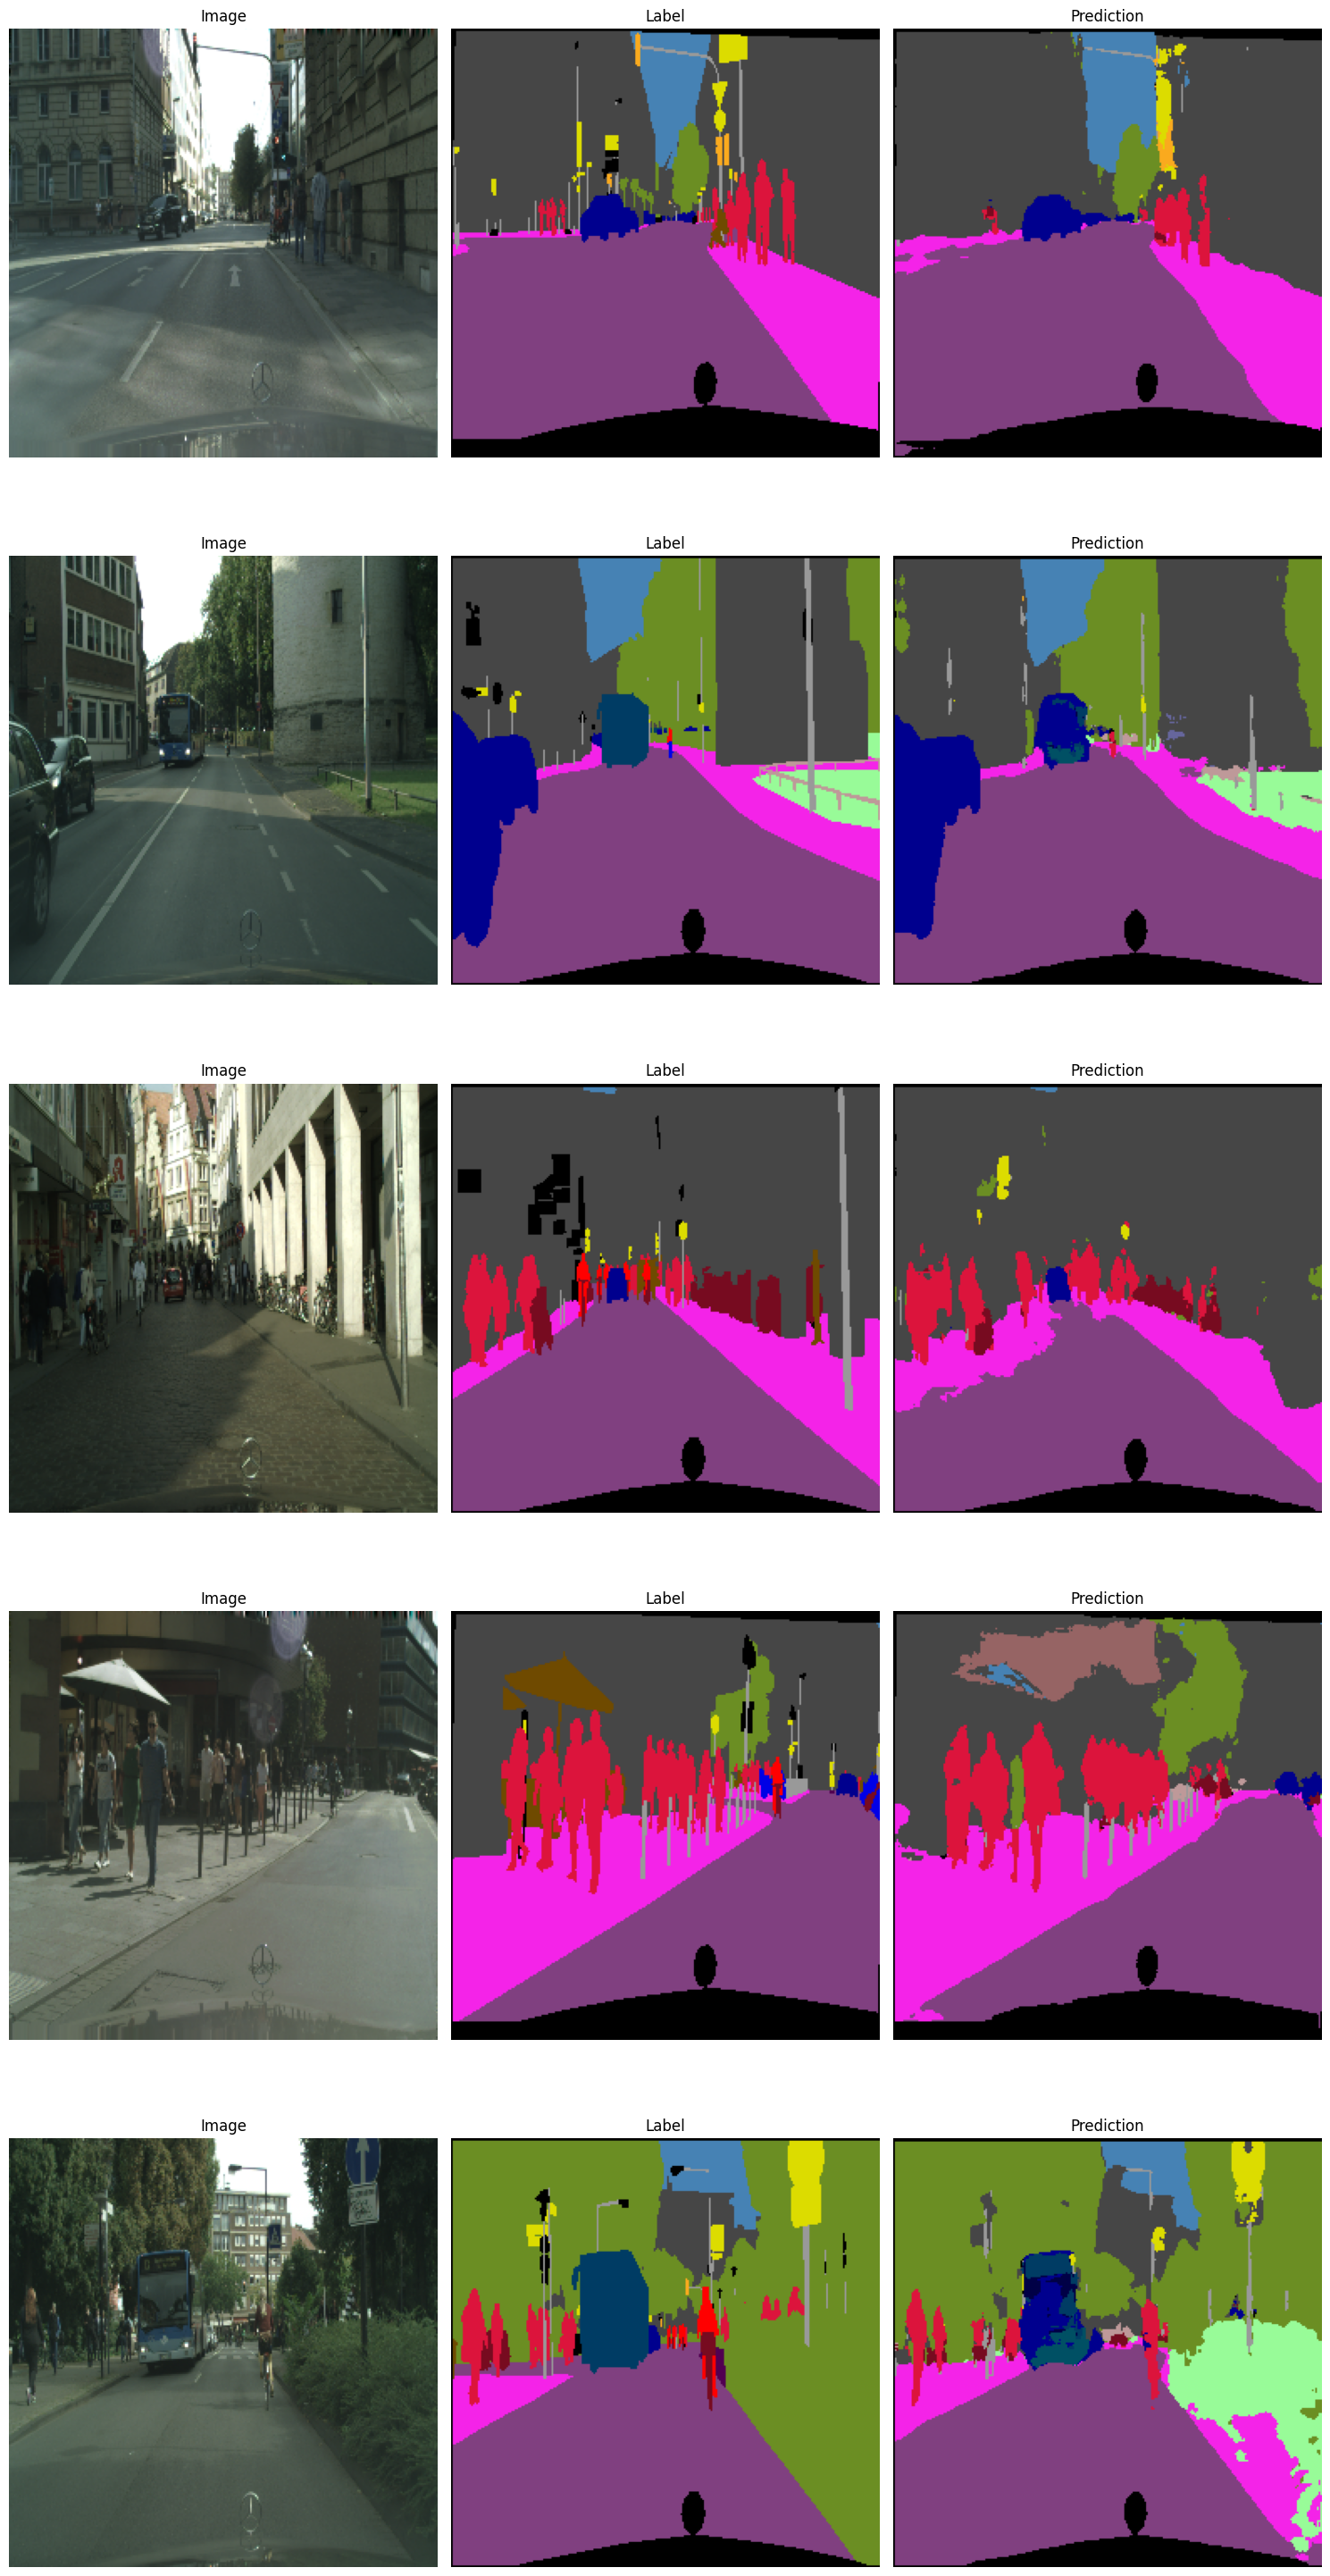

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

c = 0
img_batch, label_batch = next(iter(val_dataloader))

img_batch = img_batch.to(device)
label_batch = label_batch.to(device)
output = model(img_batch)
output = torch.argmax(output, dim=1).unsqueeze(1)

show_batch_pred((img_batch.cpu(), label_batch.cpu()), output.cpu())
